## Imports and environments

In [ ]:
%matplotlib inline
%env LUNA_DIR=/var/data/mlfzhang/LUNA/data_root
from matplotlib import pyplot as plt
import simplejson as json
import os

## Run the session evaluator.

In [3]:
session = "2017-05-17-no-lung-segmentation"

In [44]:
import sys
sys.path.insert(0,'unet')

In [ ]:
from evaluate import Evaluator
Evaluator().main([session])

unet configuration loaded from session 2017-05-17-no-lung-segmentation
n3d configuration loaded from session 2017-05-17-no-lung-segmentation
model loaded from /var/data/mlfzhang/LUNA/data_root/results/2017-05-17-no-lung-segmentation/unet_512_5_fold0.hdf5


/home/mlfzhang/Projects/foo/cancer_venv/lib64/python3.5/site-packages/keras/models.py:281: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '
  0%|          | 0/89 [00:00<?, ?it/s]

model loaded from checkpoint /var/data/mlfzhang/LUNA/data_root/results/2017-05-17-no-lung-segmentation/m3D_64_2_fold1.hdf5.


 13%|█▎        | 12/89 [02:00<14:09, 11.03s/it]

case 137763212752154081977261297097: nodule@(x113,y349,z90,d23.8401) detected again at (x114,y352,z97).


 30%|███       | 27/89 [04:38<06:39,  6.45s/it]

case 213140617640021803112060161074: nodule@(x318,y185,z199,d22.623) detected again at (x315,y185,z204).


 88%|████████▊ | 78/89 [13:12<01:35,  8.72s/it]

case 716498695101447665580610403574: nodule@(x131,y288,z329,d15.0646) detected again at (x133,y289,z325).


  0%|          | 0/89 [00:00<?, ?it/s]

{'cases': 89,
 'evaluation': {'f+': 5, 'f-': 32, 't+': 83, 't-': 20},
 'nodule_cases': 67,
 'nodules': 112}


  0%|          | 0/89 [00:00<?, ?it/s]

{'cases': 89,
 'evaluation': {'f+': 10, 'f-': 33, 't+': 95, 't-': 25},
 'nodule_cases': 61,
 'nodules': 128}


  0%|          | 0/89 [00:00<?, ?it/s]

{'cases': 89,
 'evaluation': {'f+': 8, 'f-': 22, 't+': 106, 't-': 29},
 'nodule_cases': 56,
 'nodules': 128}


 67%|██████▋   | 60/89 [10:46<05:10, 10.72s/it]

## Load and plot results.

In [16]:
evaluation = os.path.join(os.environ['LUNA_DIR'],'results', session,'evaluation.json')
evaluation = json.load(open(evaluation,'r'))
print(evaluation)

{'9': {'evaluation': {'t+': 75, 'f-': 30, 't-': 26, 'f+': 13}, 'cases': 88, 'nodules': 105}, '8': {'evaluation': {'t+': 82, 'f-': 36, 't-': 27, 'f+': 6}, 'cases': 88, 'nodules': 118}, '3': {'evaluation': {'t+': 90, 'f-': 29, 't-': 22, 'f+': 11}, 'cases': 89, 'nodules': 119}, '5': {'evaluation': {'t+': 72, 'f-': 37, 't-': 31, 'f+': 14}, 'cases': 89, 'nodules': 108}, '6': {'evaluation': {'t+': 83, 'f-': 46, 't-': 22, 'f+': 12}, 'cases': 89, 'nodules': 129}, '0': {'evaluation': {'t+': 83, 'f-': 32, 't-': 20, 'f+': 5}, 'cases': 89, 'nodules': 112}, '7': {'evaluation': {'t+': 71, 'f-': 40, 't-': 32, 'f+': 11}, 'cases': 89, 'nodules': 111}, '2': {'evaluation': {'t+': 106, 'f-': 22, 't-': 29, 'f+': 8}, 'cases': 89, 'nodules': 128}, '4': {'evaluation': {'t+': 99, 'f-': 29, 't-': 24, 'f+': 13}, 'cases': 89, 'nodules': 128}, '1': {'evaluation': {'t+': 95, 'f-': 33, 't-': 25, 'f+': 10}, 'cases': 89, 'nodules': 128}}


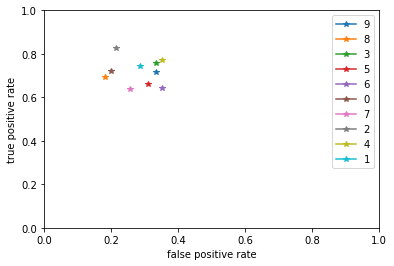

In [33]:
plt.ion()
plt.figure()
plt.clf()
for subset, data in evaluation.items():
    tp = data['evaluation']['t+']
    tn = data['evaluation']['t-']
    fp = data['evaluation']['f+']
    fn = data['evaluation']['f-']
    tpr = tp / (tp + fn) # True positive rate
    fpr = fp / (fp + tn) # false positive rate
    plt.plot([fpr], [tpr], marker='*', linestyle=None, label='{}'.format(subset))
plt.xlim([0,1])
plt.xlabel('false positive rate')
plt.ylim([0,1])
plt.ylabel('true positive rate')
plt.legend()